In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


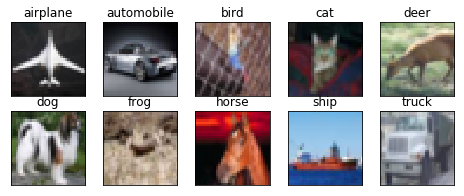

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [58]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_129 (Conv2D)          (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_101 (Activation)  (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_102 (Activation)  (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_79 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 15, 15, 96)        41568     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 14s 35ms/step - loss: 1.8764 - acc: 0.2779 - val_loss: 1.4521 - val_acc: 0.4636
Epoch 2/50
390/390 [==============================] - 9s 24ms/step - loss: 1.3945 - acc: 0.4913 - val_loss: 1.1991 - val_acc: 0.5685
Epoch 3/50
390/390 [==============================] - 9s 24ms/step - loss: 1.1825 - acc: 0.5796 - val_loss: 1.0319 - val_acc: 0.6380
Epoch 4/50
390/390 [==============================] - 9s 24ms/step - loss: 1.0567 - acc: 0.6285 - val_loss: 0.9419 - val_acc: 0.6679
Epoch 5/50
390/390 [==============================] - 9s 24ms/step - loss: 0.9493 - acc: 0.6688 - val_loss: 0.8553 - val_acc: 0.7017
Epoch 6/50
390/390 [==============================] - 9s 24ms/step - loss: 0.8807 - acc: 0.6961 - val_loss: 0.7738 - val_acc: 0.7290
Epoch 7/50
390/390 [==============================] - 9s 24ms/step - loss: 0.8131 - acc: 0.7185 - val_loss: 0.7952 - val_acc: 0.7286
Epoch 8/50
390/390 [==============================] - 9s 24ms/step -

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`


390/390 [==============================] - 9s 24ms/step - loss: 0.3540 - acc: 0.8835 - val_loss: 0.5623 - val_acc: 0.8240
Epoch 2/50
390/390 [==============================] - 9s 24ms/step - loss: 0.3435 - acc: 0.8833 - val_loss: 0.5638 - val_acc: 0.8276
Epoch 3/50
390/390 [==============================] - 9s 24ms/step - loss: 0.3458 - acc: 0.8855 - val_loss: 0.5962 - val_acc: 0.8169
Epoch 4/50
390/390 [==============================] - 9s 24ms/step - loss: 0.3466 - acc: 0.8845 - val_loss: 0.5566 - val_acc: 0.8270
Epoch 5/50
390/390 [==============================] - 9s 24ms/step - loss: 0.3370 - acc: 0.8860 - val_loss: 0.5758 - val_acc: 0.8315
Epoch 6/50
390/390 [==============================] - 9s 24ms/step - loss: 0.3362 - acc: 0.8860 - val_loss: 0.5737 - val_acc: 0.8259
Epoch 7/50
390/390 [==============================] - 9s 24ms/step - loss: 0.3412 - acc: 0.8877 - val_loss: 0.5528 - val_acc: 0.8290
Epoch 8/50
390/390 [==============================] - 9s 24ms/step - loss: 0.341

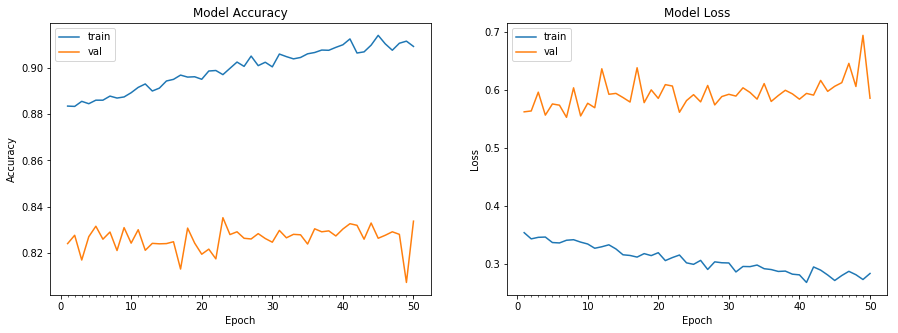

Accuracy on test data is: 83.37


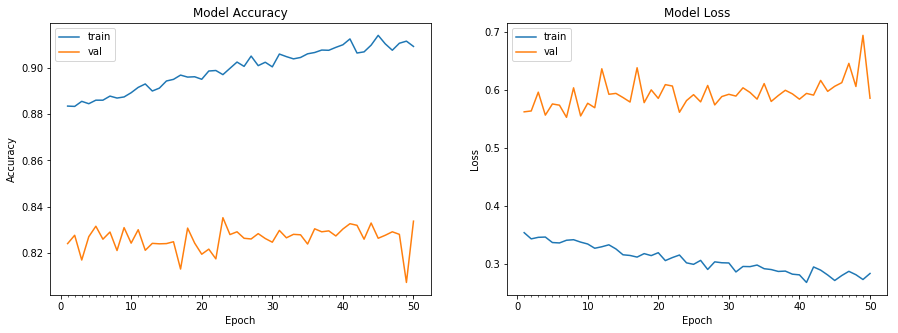

Accuracy on test data is: 83.37


In [60]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model historyfrom keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [61]:
#defining a vanila model to check starting accuracy

model1=Sequential()
model1.add(Convolution2D(32,3,3,border_mode='same',input_shape=(32,32,3)))#(3,3,32,32)        [receptive field,image size]


model1.add(Convolution2D(64,3,3,border_mode='same'))#(5,5,32,32)
model1.add(MaxPooling2D(pool_size=(2,2)))  #(10,10,16,16)

model1.add(Convolution2D(64,3,3,border_mode='same')) #(12,12,16,16)


model1.add(Convolution2D(128,3,3,border_mode='same'))  #(14x14,16x16)
model1.add(MaxPooling2D(pool_size=(2,2)))  #(28x28,8x8)



model1.add(Convolution2D(32,3,3,border_mode='same'))  #(30x30,8x8)




model1.add(Convolution2D(64,3,3,border_mode='same'))   #(32x32,8x8)

model1.add(Convolution2D(10,1,1,border_mode='same'))    #(32x32,8x8)


model1.add(Convolution2D(10,8,8))   #(40x40,1x1)





model1.add(Flatten())
model1.add(Activation('softmax'))




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-pa

In [0]:
# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_135 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_136 (Conv2D)          (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_137 (Conv2D)          (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_138 (Conv2D)          (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_139 (Conv2D)          (None, 8, 8, 32)          36896     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 12s 30ms/step - loss: 1.4817 - acc: 0.4745 - val_loss: 1.1998 - val_acc: 0.5816
Epoch 2/50
390/390 [==============================] - 7s 19ms/step - loss: 1.1038 - acc: 0.6202 - val_loss: 1.0432 - val_acc: 0.6421
Epoch 3/50
390/390 [==============================] - 7s 19ms/step - loss: 1.0019 - acc: 0.6562 - val_loss: 0.9932 - val_acc: 0.6580
Epoch 4/50
390/390 [==============================] - 7s 19ms/step - loss: 0.9221 - acc: 0.6834 - val_loss: 0.9780 - val_acc: 0.6693
Epoch 5/50
390/390 [==============================] - 7s 19ms/step - loss: 0.8658 - acc: 0.7039 - val_loss: 0.9307 - val_acc: 0.6853
Epoch 6/50
390/390 [==============================] - 7s 19ms/step - loss: 0.8118 - acc: 0.7230 - val_loss: 0.9364 - val_acc: 0.6862
Epoch 7/50
390/390 [==============================] - 7s 19ms/step - loss: 0.7567 - acc: 0.7413 - val_loss: 0.9360 - val_acc: 0.6775
Epoch 8/50
390/390 [==============================] - 7s 18ms/step -

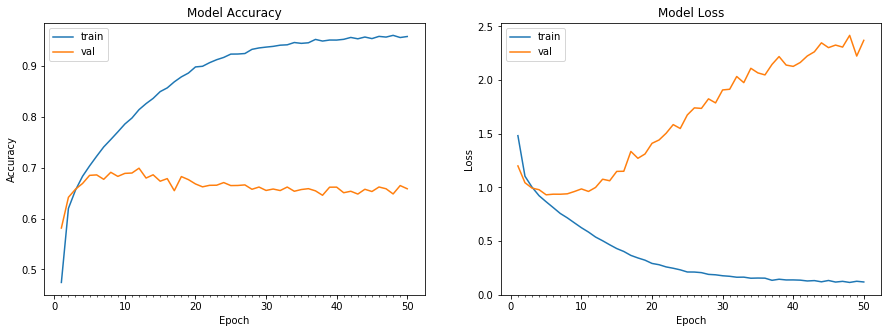

Accuracy on test data is: 65.89


In [64]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model1.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 75, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model1))

####we have trained our vanila network for 50 epocs which gives a max train accuracy aroung 97% and more than 70% for validation accuracy which gives a positive anticipation about the model

In [55]:
##Second MODEL



model2=Sequential()
model2.add(Convolution2D(32,3,3,border_mode='same',input_shape=(32,32,3)))#(3,3,32,32)        [receptive field,image size]
model2.add(BatchNormalization(axis=3))
model2.add(Activation('relu'))
model2.add(Dropout(0.1))

model2.add(Convolution2D(64,3,3,border_mode='same'))#(5,5,32,32)
model2.add(BatchNormalization(axis=3))
model2.add(Activation('relu'))
model2.add(Dropout(0.1))

model2.add(MaxPooling2D(pool_size=(2,2)))  #(10,10,16,16)


model2.add(Convolution2D(64,3,3,border_mode='same')) #(12,12,16,16)
model2.add(BatchNormalization(axis=3))
model2.add(Activation('relu'))
model2.add(Dropout(0.1))

model2.add(Convolution2D(128,3,3,border_mode='same'))  #(14x14,16x16)
model2.add(BatchNormalization(axis=3))
model2.add(Activation('relu'))
model2.add(Dropout(0.15))

model2.add(MaxPooling2D(pool_size=(2,2)))  #(28x28,8x8)
model2.add(BatchNormalization(axis=3))
model2.add(Activation('relu'))
model2.add(Dropout(0.15))


model2.add(Convolution2D(32,3,3,border_mode='same'))  #(30x30,8x8)
model2.add(BatchNormalization(axis=3))
model2.add(Activation('relu'))
model2.add(Dropout(0.15))


model2.add(Convolution2D(64,3,3,border_mode='same'))   #(32x32,8x8)
model2.add(BatchNormalization(axis=3))
model2.add(Activation('relu'))
model2.add(Dropout(0.15))

model2.add(Convolution2D(10,1,1,border_mode='same'))    #(32x32,8x8)


model2.add(Convolution2D(10,8,8))   #(40x40,1x1)


model2.add(Flatten())
model2.add(Activation('softmax'))

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: Update your `Conv2D` call to t

In [56]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 8, 8, 32)          18464     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=75)`
  if sys.path[0] == '':


Epoch 1/75
390/390 [==============================] - 20s 52ms/step - loss: 1.4218 - acc: 0.4847 - val_loss: 1.2919 - val_acc: 0.5430
Epoch 2/75
390/390 [==============================] - 15s 38ms/step - loss: 0.9439 - acc: 0.6651 - val_loss: 1.1514 - val_acc: 0.5971
Epoch 3/75
390/390 [==============================] - 15s 38ms/step - loss: 0.7770 - acc: 0.7260 - val_loss: 0.9748 - val_acc: 0.6557
Epoch 4/75
390/390 [==============================] - 15s 38ms/step - loss: 0.6898 - acc: 0.7584 - val_loss: 0.8699 - val_acc: 0.6953
Epoch 5/75
390/390 [==============================] - 15s 38ms/step - loss: 0.6284 - acc: 0.7794 - val_loss: 0.9896 - val_acc: 0.6689
Epoch 6/75
390/390 [==============================] - 15s 38ms/step - loss: 0.5789 - acc: 0.7974 - val_loss: 0.7074 - val_acc: 0.7553
Epoch 7/75
390/390 [==============================] - 15s 38ms/step - loss: 0.5334 - acc: 0.8135 - val_loss: 0.7645 - val_acc: 0.7353
Epoch 8/75
390/390 [==============================] - 15s 38ms

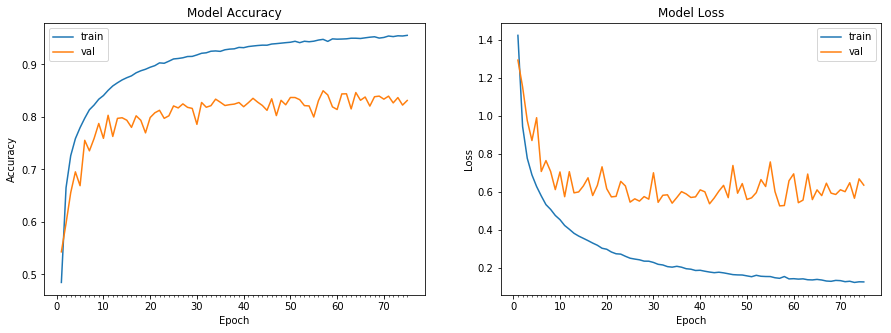

Accuracy on test data is: 83.12


In [57]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model2.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 75, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model2))

####It is clear from the model when we added the primary techniques to the model there is a significant increase in test accuracy
##Validation accuracy = 83.92%

In [52]:
##Third MODEL



model3=Sequential()
model3.add(Convolution2D(32,3,3,border_mode='same',input_shape=(32,32,3)))#(3,3,32,32)        [receptive field,image size]
model3.add(BatchNormalization(axis=3))
model3.add(Activation('relu'))
model3.add(Dropout(0.1))

model3.add(Convolution2D(64,3,3,border_mode='same'))#(5,5,32,32)
model3.add(BatchNormalization(axis=3))
model3.add(Activation('relu'))
model3.add(Dropout(0.1))

model3.add(Convolution2D(32,1,1)) #(5x5,32x32)
model3.add(BatchNormalization(axis=3))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))  #(10,10,16,16)
model3.add(Dropout(0.1))

model3.add(Convolution2D(64,3,3,border_mode='same')) #(12,12,16,16)
model3.add(BatchNormalization(axis=3))
model3.add(Activation('relu'))
model3.add(Dropout(0.1))

model3.add(Convolution2D(128,3,3,border_mode='same'))  #(14x14,16x16)
model3.add(BatchNormalization(axis=3))
model3.add(Activation('relu'))
model3.add(Dropout(0.15))

model3.add(Convolution2D(32,1,1)) #(14*14,16*16)
model3.add(BatchNormalization(axis=3))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))  #(28x28,8x8)
model3.add(BatchNormalization(axis=3))
model3.add(Activation('relu'))
model3.add(Dropout(0.15))


model3.add(Convolution2D(32,3,3,border_mode='same'))  #(30x30,8x8)
model3.add(BatchNormalization(axis=3))
model3.add(Activation('relu'))
model3.add(Dropout(0.15))


model3.add(Convolution2D(64,3,3,border_mode='same'))   #(32x32,8x8)
model3.add(BatchNormalization(axis=3))
model3.add(Activation('relu'))
model3.add(Dropout(0.15))

model3.add(Convolution2D(10,1,1,border_mode='same'))    #(32x32,8x8)
model3.add(BatchNormalization(axis=3))
model3.add(Activation('relu'))
model3.add(Dropout(0.1))

model3.add(Convolution2D(10,8,8))   #(40x40,1x1)


model3.add(Flatten())
model3.add(Activation('softmax'))

# Compile the model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Updat

In [53]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_111 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_62 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_82 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_63 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_63 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_83 (Activation)   (None, 32, 32, 64)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=75)`
  if sys.path[0] == '':


Epoch 1/75
390/390 [==============================] - 21s 55ms/step - loss: 1.5660 - acc: 0.4191 - val_loss: 1.4766 - val_acc: 0.4716
Epoch 2/75
390/390 [==============================] - 16s 42ms/step - loss: 1.1532 - acc: 0.5820 - val_loss: 1.1844 - val_acc: 0.5856
Epoch 3/75
390/390 [==============================] - 16s 42ms/step - loss: 0.9615 - acc: 0.6578 - val_loss: 0.9624 - val_acc: 0.6642
Epoch 4/75
390/390 [==============================] - 16s 41ms/step - loss: 0.8518 - acc: 0.6998 - val_loss: 0.8954 - val_acc: 0.6839
Epoch 5/75
390/390 [==============================] - 16s 41ms/step - loss: 0.7963 - acc: 0.7190 - val_loss: 0.8077 - val_acc: 0.7160
Epoch 6/75
390/390 [==============================] - 16s 42ms/step - loss: 0.7464 - acc: 0.7359 - val_loss: 0.7177 - val_acc: 0.7464
Epoch 7/75
390/390 [==============================] - 16s 42ms/step - loss: 0.7067 - acc: 0.7527 - val_loss: 0.8362 - val_acc: 0.7113
Epoch 8/75
390/390 [==============================] - 16s 42ms

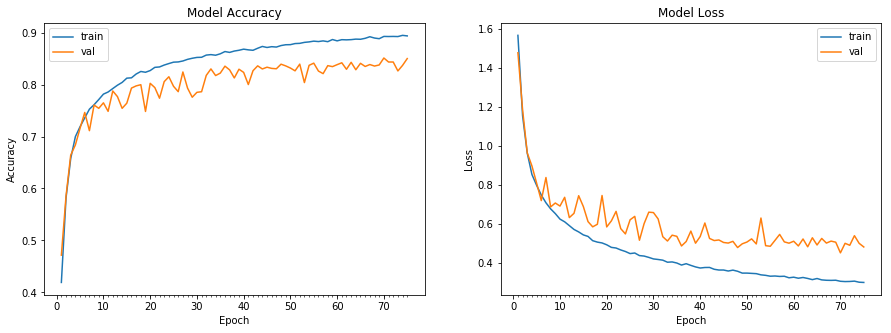

Accuracy on test data is: 85.01


In [54]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model3.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 75, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model3))

###we have improved a lot in test accuracy after tweaking the model with right techniques